# EXERCICE 1

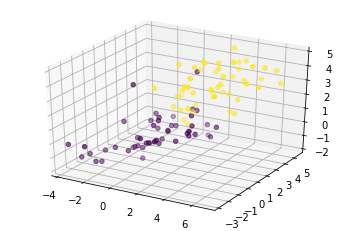

In [1]:
import matplotlib.pyplot as plt #graphique
import numpy as np # calcul matriciel
import pandas as pd # création de data.frame
import numpy.random as npr # stochastique
import scipy.stats as stats # stat
from math import pi,log,sqrt # fonction math
import seaborn as sns # graphiques avancés avec pandas

''' création de 3 nuages gaussiens en 3 dimensionsde même matrices de covariances
 1 : $\mu_1$ = [0,0,0] $\Sigma_1=$[[3,1,0.5],[1,2,0.5],[0.5,0.5,1]]
 2 : $\mu_1$ = [3,3,3] $\Sigma_2=\Sigma_1=$
'''
mu1=np.array([0,0,0])
mu2=np.array([3,3,3])
S=np.array([[3,1,0.5],[1,2,0.5],[0.5,0.5,1]])
A=np.linalg.cholesky(S)
A.dot(A.T)
X1=npr.randn(50,3).dot(A.T)+mu1
g1=np.mean(X1,0);g1
W1=np.cov(X1,rowvar=False);W1
X2=npr.randn(50,3).dot(A.T)+mu2
g2=np.mean(X2,0);g2
W2=np.cov(X2,rowvar=False);W2
X=np.concatenate((X1, X2))
y=np.concatenate((np.ones(50),np.ones(50)*2));y
from mpl_toolkits.mplot3d import Axes3D # graphique 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], X[:,2], c=y)

Text(0.5, 1.0, 'Score LD1')

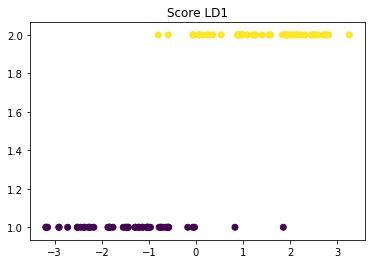

In [2]:
''' AFD et visualisation LD1
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,y) #ajustement du modèle
LD1=lda.transform(X) # création des LD avec le modèle
plt.scatter(LD1,y,c=y) #stripchart
plt.title('Score LD1')

In [ ]:
QUESTION 3 :
On évalue maintenant la qualité de prédiction. Interpréter les instructions suivantes

In [5]:
y_pred=lda.predict(X)
from sklearn.metrics import confusion_matrix,roc_curve,auc
print(confusion_matrix(y,y_pred))
lda.score(X,y)

[[48  2]
 [ 4 46]]


0.94

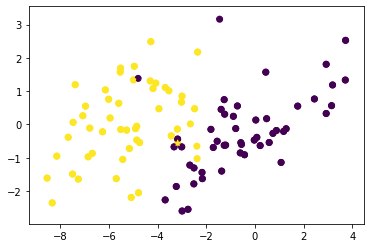

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=2)
pca.fit(scale(X))
pca.explained_variance_
PC=pca.transform(X)
plt.scatter(PC[:,0],PC[:,1],c=y)
plt.scatter(PC[y==y_pred,0],PC[y==y_pred,1],c=y[y==y_pred])
plt.scatter(PC[y!=y_pred,0],PC[y!=y_pred,1],c=y[y!=y_pred],marker='*')

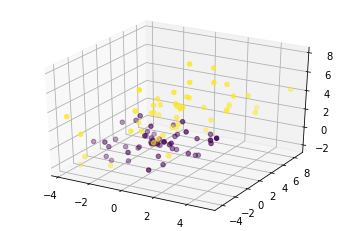

In [7]:
mu2=np.array([1,2,3])
S1=np.array([[3,1,0.5],[1,2,0.5],[0.5,0.5,1]])
S2=np.array([[4,6,2],[6,10,3],[2,3,5]])
A1=np.linalg.cholesky(S1)
A1.dot(A1.T)
A2=np.linalg.cholesky(S2)
A2.dot(A2.T)
X1=npr.randn(50,3).dot(A1.T)+mu1
g1=np.mean(X1,0);g1
W1=np.cov(X1,rowvar=False);W1
X2=npr.randn(50,3).dot(A2.T)+mu2
g2=np.mean(X2,0);g2
W2=np.cov(X2,rowvar=False);W2
X=np.concatenate((X1, X2))
y=np.concatenate((np.ones(50),np.ones(50)*2));y
from mpl_toolkits.mplot3d import Axes3D # graphique 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], X[:,2], c=y)

Text(0.5, 1.0, 'Score QD1')

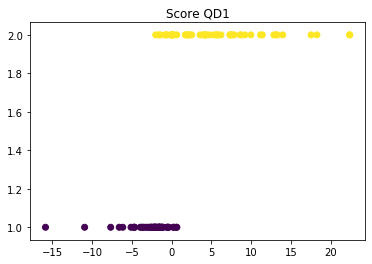

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y) #ajustement du modèle
ypred = qda.predict(X)
QD1=qda.decision_function(X) # création des QD avec le modèle
plt.scatter(QD1,y,c=y) #stripchart
plt.title('Score QD1')

In [11]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
matrice_conf = (confusion_matrix(y,ypred))
print(matrice_conf)
qda.score(X,y)

[[46  4]
 [ 9 41]]


0.87

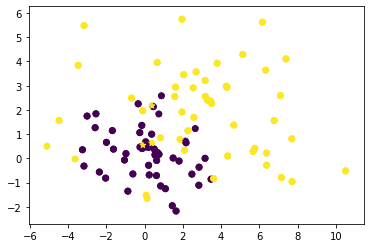

In [12]:
pca.fit(scale(X))
pca.explained_variance_
PC=pca.transform(X)
plt.scatter(PC[:,0],PC[:,1],c=y)
plt.scatter(PC[y==ypred,0],PC[y==ypred,1],c=y[y==ypred])
plt.scatter(PC[y!=ypred,0],PC[y!=ypred,1],c=y[y!=ypred],marker='*')

In [13]:
mu1=np.array([0,0,0])
mu2=np.array([3,3,3])
mu3=np.array([0,0,3])
S=np.array([[3,1,0.5],[1,2,0.5],[0.5,0.5,1]])
A=np.linalg.cholesky(S)
A.dot(A.T)
X1=npr.randn(50,3).dot(A.T)+mu1
g1=np.mean(X1,0);g1
W1=np.cov(X1,rowvar=False);W1
X2=npr.randn(50,3).dot(A.T)+mu2
g2=np.mean(X2,0);g2
W2=np.cov(X2,rowvar=False);W2
X3=npr.randn(50,3).dot(A.T)+mu3
g3=np.mean(X3,0);g3
W3=np.cov(X3,rowvar=False);W3

X=np.concatenate((X1, X2,X3))
y=np.concatenate((np.ones(50),np.ones(50)*2,np.ones(50)*3));y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

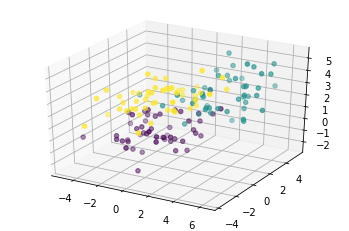

In [14]:
from mpl_toolkits.mplot3d import Axes3D # graphique 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], X[:,2], c=y)

Text(0.5, 1.0, 'Score LD1')

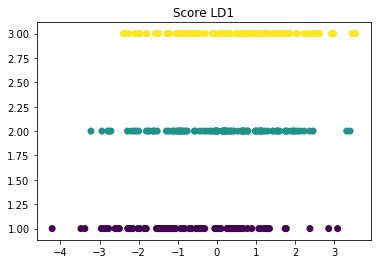

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,y) #ajustement du modèle
LD1=lda.transform(X);LD1 # création des LD avec le modèle
Y=np.concatenate((y,y),axis=0).reshape(150,2)
plt.scatter(LD1,Y,c=Y) #stripchart
plt.title('Score LD1')

In [16]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
ypred = lda.predict(X)
matrice_conf = (confusion_matrix(y,ypred))
print(matrice_conf)
lda.score(X,y)

[[43  4  3]
 [ 3 42  5]
 [ 1  9 40]]


0.8333333333333334

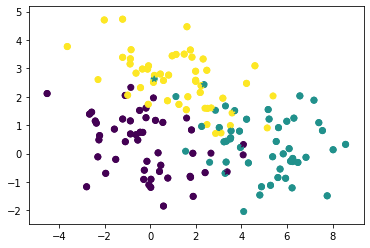

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=2)
pca.fit(scale(X))
pca.explained_variance_
PC=pca.transform(X)
plt.scatter(PC[:,0],PC[:,1],c=y)
plt.scatter(PC[y==ypred,0],PC[y==ypred,1],c=y[y==ypred])
plt.scatter(PC[y!=ypred,0],PC[y!=ypred,1],c=y[y!=ypred],marker='*')

# EXERCICE 2 : un exemple concret : wine.

Text(0.5, 1.0, 'Variable alcohol, F=135.0')

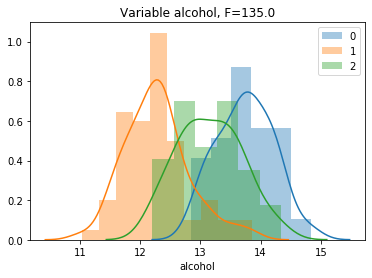

In [18]:
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.random as npr
import scipy.stats as stats
from math import pi,log,sqrt
import seaborn as sns
from sklearn import datasets
wine = datasets.load_wine()
# print(wine['DESCR'])
X=wine.data
y=wine.target
#création d'un data frame pour les graphiques et statsmodels
data = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data['target']=pd.Categorical(wine['target']) #transformation en facteur
#data.describe()
#wine['feature_names']
L='alcohol' #L = variable étudiée
for i in data.target.unique():
    F,p=stats.f_oneway(data[L][data.target==0],data[L][data.target==1],\
    data[L][data.target==2])
    sns.distplot(data[L][data.target==i],
                 kde=1,label='{}'.format(i))
plt.legend()
plt.title('Variable {}, F={}'.format(L,round(F)))

In [19]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
lm=ols('alcohol~ C(target)',data=data).fit()
lm.summary()
sm.stats.anova_lm(lm, typ=2)
lm.diagn
stats.shapiro(lm.resid)
stats.levene(lm.resid,data['target']) # équivalent bartlett
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['alcohol'], data['target'])
mc_lm = mc.tukeyhsd()
print(mc_lm)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -1.466 0.001 -1.6792 -1.2528   True
     0      2   -0.591 0.001 -0.8262 -0.3558   True
     1      2    0.875 0.001  0.6489  1.1012   True
---------------------------------------------------


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.75, test_size=0.25)

In [21]:
X_test,y_test

(array([[1.358000e+01, 1.660000e+00, 2.360000e+00, 1.910000e+01,
         1.060000e+02, 2.860000e+00, 3.190000e+00, 2.200000e-01,
         1.950000e+00, 6.900000e+00, 1.090000e+00, 2.880000e+00,
         1.515000e+03],
        [1.374000e+01, 1.670000e+00, 2.250000e+00, 1.640000e+01,
         1.180000e+02, 2.600000e+00, 2.900000e+00, 2.100000e-01,
         1.620000e+00, 5.850000e+00, 9.200000e-01, 3.200000e+00,
         1.060000e+03],
        [1.305000e+01, 1.730000e+00, 2.040000e+00, 1.240000e+01,
         9.200000e+01, 2.720000e+00, 3.270000e+00, 1.700000e-01,
         2.910000e+00, 7.200000e+00, 1.120000e+00, 2.910000e+00,
         1.150000e+03],
        [1.229000e+01, 1.410000e+00, 1.980000e+00, 1.600000e+01,
         8.500000e+01, 2.550000e+00, 2.500000e+00, 2.900000e-01,
         1.770000e+00, 2.900000e+00, 1.230000e+00, 2.740000e+00,
         4.280000e+02],
        [1.348000e+01, 1.670000e+00, 2.640000e+00, 2.250000e+01,
         8.900000e+01, 2.600000e+00, 1.100000e+00, 5.200000

Text(0.5, 1.0, 'Score LD_test')

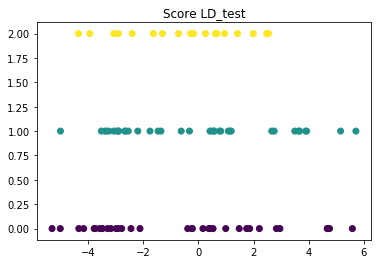

In [22]:
from sklearn.metrics import confusion_matrix
lda.fit(X_train,y_train) #ajustement du modèle
LD_test = lda.transform(X_test) # création des LD avec le modèle
Y_test = np.concatenate((y_test,y_test)).reshape(45,2)
plt.scatter(LD_test,Y_test,c=Y_test) #stripchart
plt.title('Score LD_test')

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,train_size = 0.75, test_size=0.25)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,train_size = 0.75, test_size=0.25)
ypred1 = lda.predict(X_test1)
ypred2 = lda.predict(X_test2)
matrice_conf1 = (confusion_matrix(y_test1,ypred1))
matrice_conf2 = (confusion_matrix(y_test2,ypred2))
print(matrice_conf1)
print(matrice_conf2)
score1 = np.matrix.trace(matrice_conf1)/np.sum(matrice_conf1)
score2 = np.matrix.trace(matrice_conf2)/np.sum(matrice_conf2)
print((score1+score2)/2)

[[15  0  0]
 [ 0 19  0]
 [ 0  0 11]]
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
1.0


In [25]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(2,13):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    prediction= neigh.predict(X_test)
    matrice_conf = (confusion_matrix(y_test,prediction))
    print(matrice_conf)
    score = np.matrix.trace(matrice_conf)/np.sum(matrice_conf)
    print(k,score)

[[15  0  2]
 [ 2 15  1]
 [ 1  7  2]]
2 0.7111111111111111
[[15  0  2]
 [ 2 12  4]
 [ 2  5  3]]
3 0.6666666666666666
[[15  0  2]
 [ 2 12  4]
 [ 1  7  2]]
4 0.6444444444444445
[[15  0  2]
 [ 2 11  5]
 [ 0  6  4]]
5 0.6666666666666666
[[15  0  2]
 [ 2 11  5]
 [ 0  4  6]]
6 0.7111111111111111
[[16  0  1]
 [ 2 11  5]
 [ 1  5  4]]
7 0.6888888888888889
[[16  0  1]
 [ 2 12  4]
 [ 1  4  5]]
8 0.7333333333333333
[[16  0  1]
 [ 2 11  5]
 [ 1  6  3]]
9 0.6666666666666666
[[17  0  0]
 [ 2 11  5]
 [ 1  5  4]]
10 0.7111111111111111
[[17  0  0]
 [ 2 11  5]
 [ 1  5  4]]
11 0.7111111111111111
[[17  0  0]
 [ 2 10  6]
 [ 1  4  5]]
12 0.7111111111111111
